In [115]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import svm
import sklearn.datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [117]:
house_price_dataframe= pd.read_csv('清洗数据.csv')
house_price_dataframe =house_price_dataframe.drop('label',axis=1)
X = house_price_dataframe.drop(['Price'], axis=1)

In [119]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [121]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [123]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()  # 累积方差

In [125]:
print("每个主成分的方差解释比例：", explained_variance)
print("累计方差解释比例：", cumulative_variance)


每个主成分的方差解释比例： [0.25923743 0.23242932 0.15983653 0.13589479 0.11476309 0.07723576
 0.01467019 0.00593288]
累计方差解释比例： [0.25923743 0.49166675 0.65150329 0.78739807 0.90216117 0.97939692
 0.99406712 1.        ]


In [127]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题

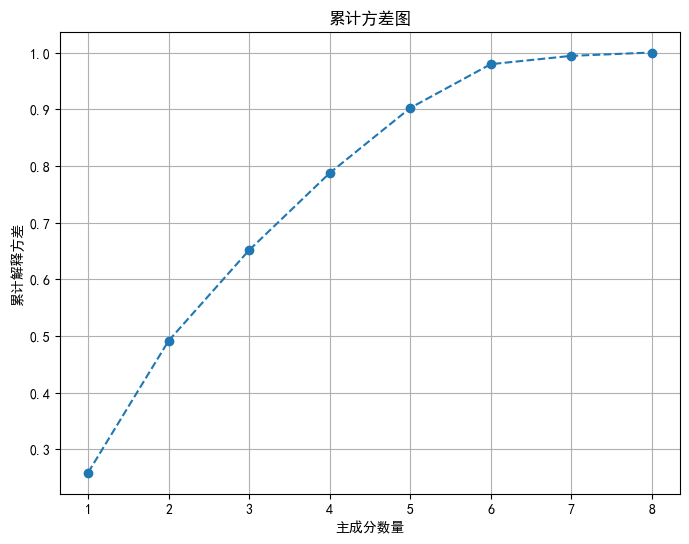

In [129]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('主成分数量')
plt.ylabel('累计解释方差')
plt.title('累计方差图')
plt.grid(True)
plt.savefig("累计方差图.png", dpi=300) 
plt.show()


In [131]:
threshold = 0.95  # 设置一个阈值，例如95%的方差
n_components = (cumulative_variance >= threshold).argmax() + 1
print(f"选择的主成分数量：{n_components} (累计方差超过 {threshold*100}% 的点)")

选择的主成分数量：6 (累计方差超过 95.0% 的点)


In [133]:
X = house_price_dataframe.drop(['Price'], axis=1)
Y = house_price_dataframe['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [135]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [137]:
pca = PCA(n_components=0.95) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [139]:
regressor = LinearRegression()
regressor.fit(X_train_pca, Y_train)


LinearRegression()

In [141]:
Y_train_predict = regressor.predict(X_train_pca)
Y_test_predict = regressor.predict(X_test_pca)
r_train = metrics.r2_score(Y_train, Y_train_predict)
mse_train = mean_squared_error(Y_train, Y_train_predict)
r_test = metrics.r2_score(Y_test, Y_test_predict)
mse_test = mean_squared_error(Y_test, Y_test_predict)
print(f"训练集 R^2: {r_train}")
print(f"训练集 MSE: {mse_train}")
print(f"测试集 R^2: {r_test}")
print(f"测试集 MSE: {mse_test}")

训练集 R^2: 0.5019450428295864
训练集 MSE: 0.6171311144100242
测试集 R^2: 0.5007758833884726
测试集 MSE: 0.5952477001330609


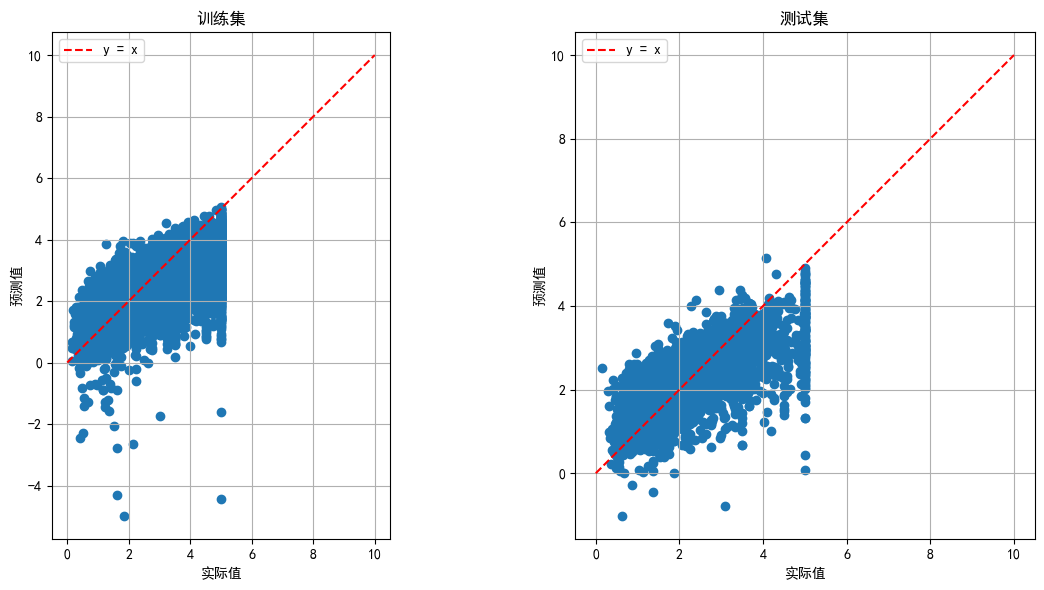

In [87]:
x_values = np.linspace(0, 10, 100)
fig_size = (12, 6)  # 12 英寸宽, 6 英寸高
fig, ax = plt.subplots(1, 2, figsize=fig_size)

ax[0].plot(x_values, x_values, color='red', linestyle='--', label='y = x')
ax[0].scatter(Y_train, Y_train_predict)
ax[0].set_xlabel("实际值")
ax[0].set_ylabel("预测值")
ax[0].set_title("训练集")
ax[0].set_aspect('equal', adjustable='box')
ax[0].legend()
ax[0].grid()

ax[1].plot(x_values, x_values, color='red', linestyle='--', label='y = x')
ax[1].scatter(Y_test, Y_test_predict)
ax[1].set_xlabel("实际值")
ax[1].set_ylabel("预测值")
ax[1].set_title("测试集")
ax[1].set_aspect('equal', adjustable='box')
ax[1].legend()
ax[1].grid()
plt.savefig("线性回归-PCA.png", dpi=300, bbox_inches='tight') 
plt.tight_layout()
plt.show()


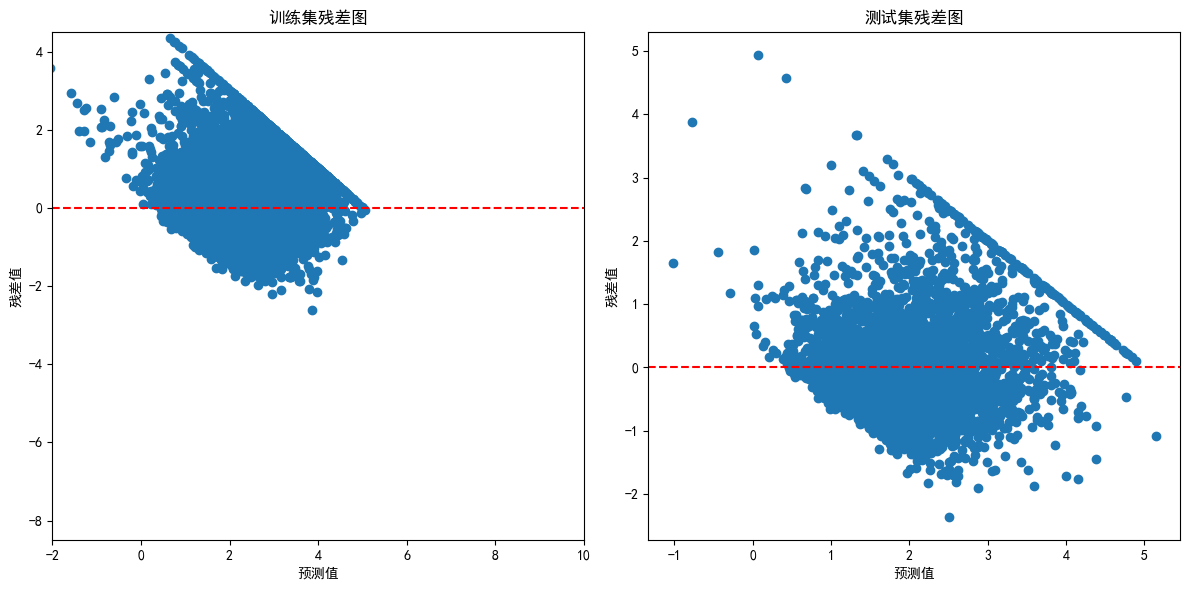

In [89]:
residuals_train = Y_train-Y_train_predict
residuals_test = Y_test-Y_test_predict
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(Y_train_predict, residuals_train)
ax[0].axhline(0, color='red', linestyle='--')  # 添加 y=0 的水平线
ax[0].set_title('训练集残差图')
ax[0].set_xlabel('预测值')
ax[0].set_ylabel('残差值')

ax[0].set_xlim(-2, 10)  
ax[0].set_ylim(-8.5, 4.5) 

ax[1].scatter(Y_test_predict, residuals_test)
ax[1].axhline(0, color='red', linestyle='--')  # 添加 y=0 的水平线
ax[1].set_title('测试集残差图')
ax[1].set_xlabel('预测值')
ax[1].set_ylabel('残差值')

ax[0].set_xlim(-2, 10)  
ax[0].set_ylim(-8.5, 4.5) 
plt.savefig("线性回归-PCA-残差.png", dpi=300, bbox_inches='tight') 
plt.tight_layout()
plt.show()

In [91]:
classifier = svm.SVR()
classifier.fit(X_train_pca, Y_train)

SVR()

In [92]:
Y_train_predict = classifier.predict(X_train_pca)
Y_test_predict = classifier.predict(X_test_pca)
r_train_1 = metrics.r2_score(Y_train, Y_train_predict)
mse_train_1 = mean_squared_error(Y_train, Y_train_predict)
r_test_1 = metrics.r2_score(Y_test, Y_test_predict)
mse_test_1 = mean_squared_error(Y_test, Y_test_predict)
print(f"训练集 R^2: {r_train_1}")
print(f"训练集 MSE: {mse_train_1}")
print(f"测试集 R^2: {r_test_1}")
print(f"测试集 MSE: {mse_test_1}")

训练集 R^2: 0.6793824293530598
训练集 MSE: 0.3972715778132098
测试集 R^2: 0.6621307210291145
测试集 MSE: 0.40285696255642633


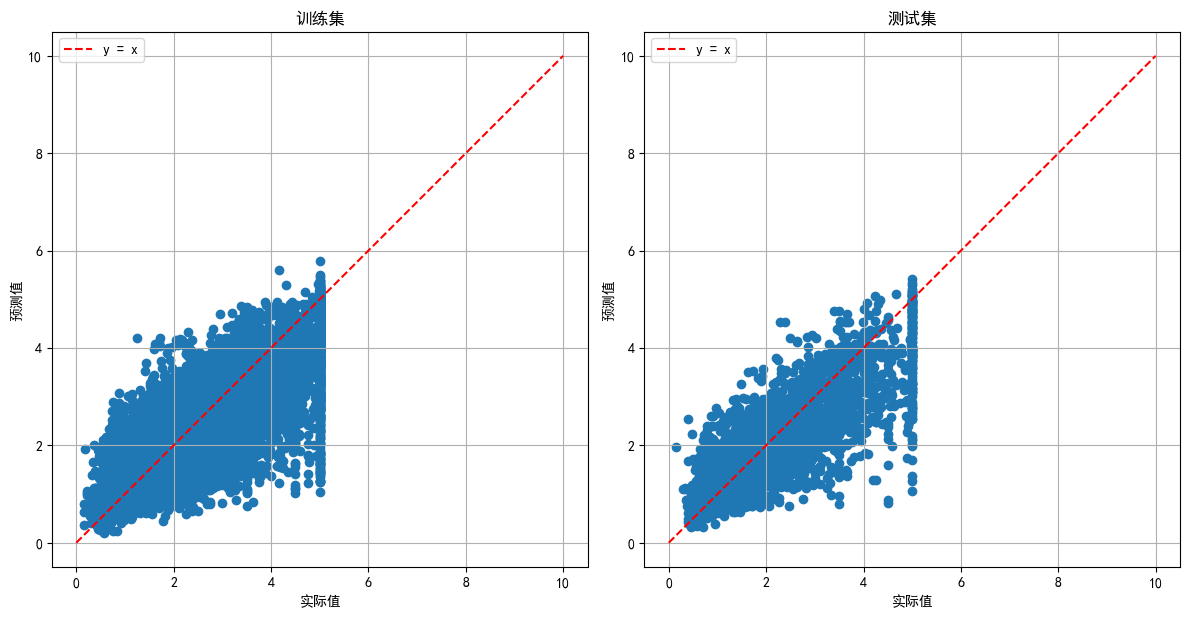

In [95]:
x_values = np.linspace(0, 10, 100)
fig_size = (12, 6)  # 12 英寸宽, 6 英寸高
fig, ax = plt.subplots(1, 2, figsize=fig_size)

ax[0].plot(x_values, x_values, color='red', linestyle='--', label='y = x')
ax[0].scatter(Y_train, Y_train_predict)
ax[0].set_xlabel("实际值")
ax[0].set_ylabel("预测值")
ax[0].set_title("训练集")
ax[0].set_aspect('equal', adjustable='box')
ax[0].legend()
ax[0].grid()

ax[1].plot(x_values, x_values, color='red', linestyle='--', label='y = x')
ax[1].scatter(Y_test, Y_test_predict)
ax[1].set_xlabel("实际值")
ax[1].set_ylabel("预测值")
ax[1].set_title("测试集")
ax[1].set_aspect('equal', adjustable='box')
ax[1].legend()
ax[1].grid()
plt.savefig("SVR-PCA.png", dpi=300, bbox_inches='tight') 
plt.tight_layout()
plt.show()


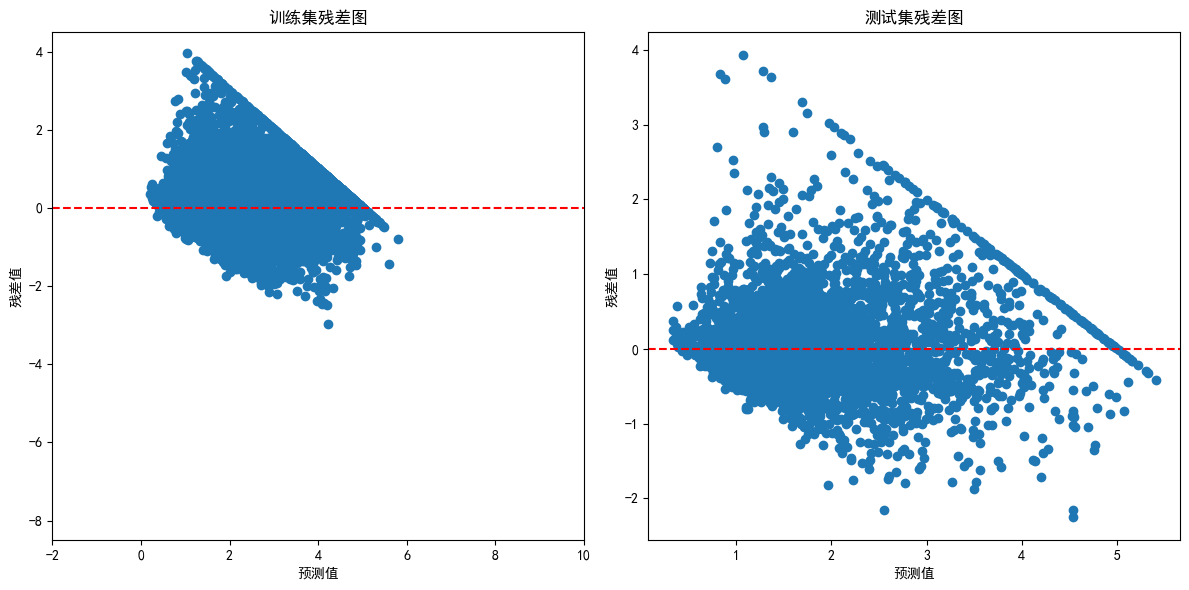

In [97]:
residuals_train = Y_train-Y_train_predict
residuals_test = Y_test-Y_test_predict
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(Y_train_predict, residuals_train)
ax[0].axhline(0, color='red', linestyle='--')  # 添加 y=0 的水平线
ax[0].set_title('训练集残差图')
ax[0].set_xlabel('预测值')
ax[0].set_ylabel('残差值')

ax[0].set_xlim(-2, 10)  
ax[0].set_ylim(-8.5, 4.5) 

ax[1].scatter(Y_test_predict, residuals_test)
ax[1].axhline(0, color='red', linestyle='--')  # 添加 y=0 的水平线
ax[1].set_title('测试集残差图')
ax[1].set_xlabel('预测值')
ax[1].set_ylabel('残差值')

ax[0].set_xlim(-2, 10)  
ax[0].set_ylim(-8.5, 4.5) 
plt.savefig("SVR-PCA-残差.png", dpi=300, bbox_inches='tight') 
plt.tight_layout()
plt.show()

In [99]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_pca.shape[1], activation='relu'))  # 输入层和第一个隐藏层
model.add(Dense(32, activation='relu'))  # 第二个隐藏层
model.add(Dense(1))  # 输出层，回归问题通常只有一个输出节点

In [101]:
model.compile(optimizer=Adam(), loss='mean_squared_error')

In [103]:
history = model.fit(X_train_pca, Y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/100
812/812 [==============================] - 1s 951us/step - loss: 0.6584 - val_loss: 0.4537
Epoch 2/100
812/812 [==============================] - 1s 863us/step - loss: 0.4592 - val_loss: 0.4335
Epoch 3/100
812/812 [==============================] - 1s 841us/step - loss: 0.4422 - val_loss: 0.4169
Epoch 4/100
812/812 [==============================] - 1s 824us/step - loss: 0.4317 - val_loss: 0.4136
Epoch 5/100
812/812 [==============================] - 1s 854us/step - loss: 0.4239 - val_loss: 0.4046
Epoch 6/100
812/812 [==============================] - 1s 827us/step - loss: 0.4145 - val_loss: 0.4025
Epoch 7/100
812/812 [==============================] - 1s 837us/step - loss: 0.4129 - val_loss: 0.4187
Epoch 8/100
812/812 [==============================] - 1s 835us/step - loss: 0.4082 - val_loss: 0.4018
Epoch 9/100
812/812 [==============================] - 1s 847us/step - loss: 0.4035 - val_loss: 0.4023
Epoch 10/100
812/812 [==============================] - 1s 809us/step - l

In [104]:
Y_train_predict =model.predict(X_train_pca)
Y_test_predict = model.predict(X_test_pca)
r_train_2 = metrics.r2_score(Y_train, Y_train_predict)
mse_train_2 = mean_squared_error(Y_train, Y_train_predict)
r_test_2 = metrics.r2_score(Y_test, Y_test_predict)
mse_test_2 = mean_squared_error(Y_test, Y_test_predict)
print(f"训练集 R^2: {r_train_2}")
print(f"训练集 MSE: {mse_train_2}")
print(f"测试集 R^2: {r_test_2}")
print(f"测试集 MSE: {mse_test_2}")

127/127 [==============================] - 0s 556us/step
训练集 R^2: 0.7299900427720423
训练集 MSE: 0.3345645764727891
测试集 R^2: 0.6838241182592137
测试集 MSE: 0.37699093489547164


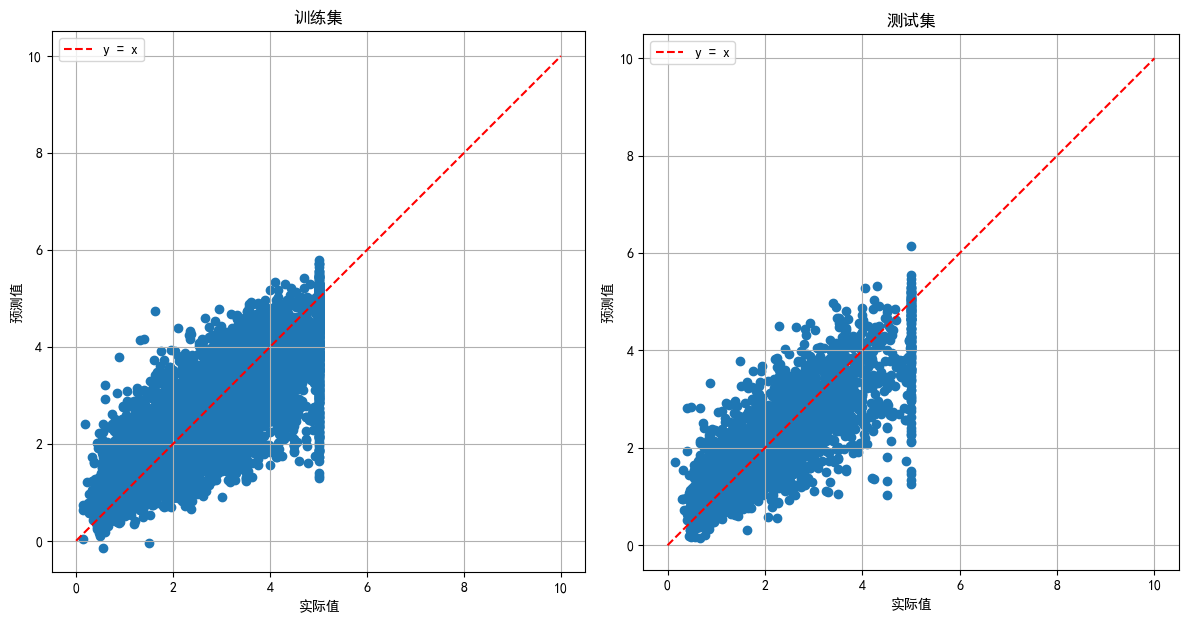

In [107]:
x_values = np.linspace(0, 10, 100)
fig_size = (12, 6)  # 12 英寸宽, 6 英寸高
fig, ax = plt.subplots(1, 2, figsize=fig_size)

ax[0].plot(x_values, x_values, color='red', linestyle='--', label='y = x')
ax[0].scatter(Y_train, Y_train_predict)
ax[0].set_xlabel("实际值")
ax[0].set_ylabel("预测值")
ax[0].set_title("训练集")
ax[0].set_aspect('equal', adjustable='box')
ax[0].legend()
ax[0].grid()

ax[1].plot(x_values, x_values, color='red', linestyle='--', label='y = x')
ax[1].scatter(Y_test, Y_test_predict)
ax[1].set_xlabel("实际值")
ax[1].set_ylabel("预测值")
ax[1].set_title("测试集")
ax[1].set_aspect('equal', adjustable='box')
ax[1].legend()
ax[1].grid()
plt.savefig("NN-PCA.png", dpi=300, bbox_inches='tight') 
plt.tight_layout()
plt.show()


In [111]:
Y_train_predict = Y_train_predict.reshape(-1)
Y_test_predict= Y_test_predict.reshape(-1)

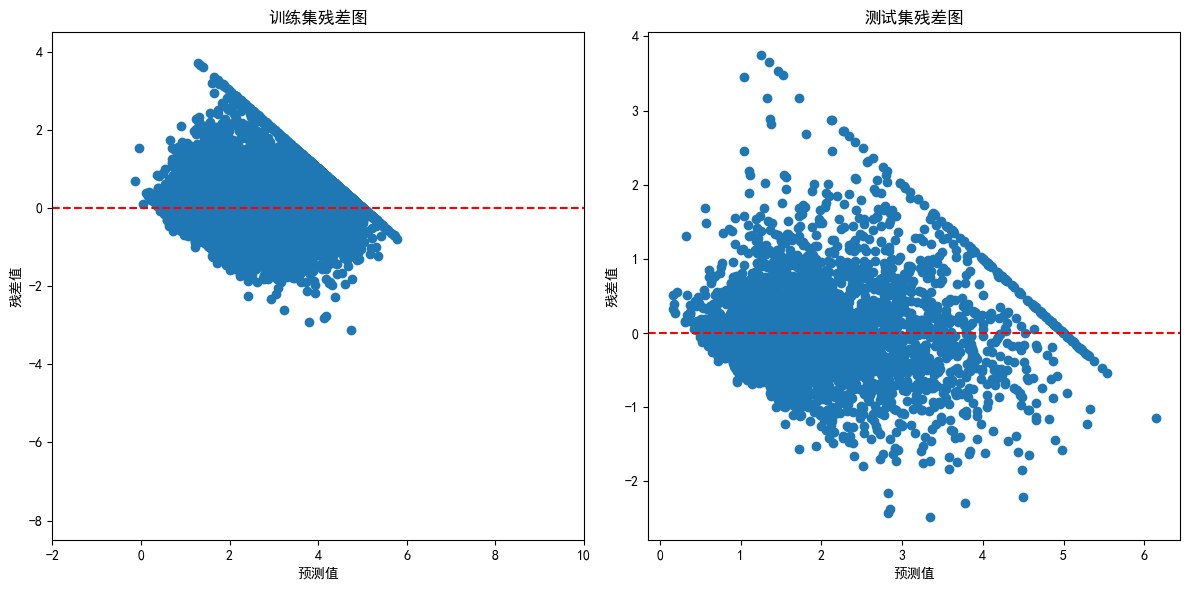

In [113]:
residuals_train = Y_train-Y_train_predict
residuals_test = Y_test-Y_test_predict
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(Y_train_predict, residuals_train)
ax[0].axhline(0, color='red', linestyle='--')  # 添加 y=0 的水平线
ax[0].set_title('训练集残差图')
ax[0].set_xlabel('预测值')
ax[0].set_ylabel('残差值')

ax[0].set_xlim(-2, 10)  
ax[0].set_ylim(-8.5, 4.5) 

ax[1].scatter(Y_test_predict, residuals_test)
ax[1].axhline(0, color='red', linestyle='--')  # 添加 y=0 的水平线
ax[1].set_title('测试集残差图')
ax[1].set_xlabel('预测值')
ax[1].set_ylabel('残差值')

ax[0].set_xlim(-2, 10)  
ax[0].set_ylim(-8.5, 4.5) 
plt.savefig("NN-PCA-残差.png", dpi=300, bbox_inches='tight') 
plt.tight_layout()
plt.show()